#  Project: Markov Simulation

## 1. EDA the supermarket data
    In this part, the following tasks need to be performed:
    
    "
    1.Calculate the total number of customers in each section

    2.Calculate the total number of customers in each section over time

    3.Display the number of customers at checkout over time

    4.Calculate the time each customer spent in the market

    5.Calculate the total number of customers in the supermarket over time.

    6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).
    "


In [1]:
import pandas as pd
import os

In [4]:
pwd()

'C:\\Users\\zhang\\spiced_bootcamp\\LemonAiders'

In [5]:
#get the full data

def eda_data(filepath):
    import os
    f=os.listdir(filepath)
    dff=pd.DataFrame(columns=['timestamp', 'location', 'customer_id'])
    for i in f:
        df=pd.read_csv(f'./data/{i}',delimiter=';',parse_dates=True)
        #change timestamp to datatime
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        #set timestamp as index
        df.set_index('timestamp',drop=True, inplace=True)
        df['day']=df.index.day
        #change data type of customer_no
        df[['customer_no','day']]=df[['customer_no','day']].astype('string')
        #generate uni customer_id for every customer in 5 days.
        df['customer_id']=df['day']+df['customer_no']
        df.drop(['customer_no','day'],axis=1, inplace =True)
        df.reset_index(inplace=True)
        dff=pd.concat([dff,df])
    dff.set_index('timestamp',drop=True, inplace=True)
    return dff



In [8]:

# list all the files in the folder

filepath = './data/'
df=eda_data(filepath)

In [9]:
# explore the unique value in column 'location'
df['location'].unique()

array(['dairy', 'drinks', 'fruit', 'checkout', 'spices'], dtype=object)

In [11]:
df

,location,customer_id
timestamp,,
2019-09-06 07:00:00,dairy,61
2019-09-06 07:00:00,drinks,62
2019-09-06 07:00:00,fruit,63
2019-09-06 07:01:00,checkout,62
2019-09-06 07:01:00,drinks,64
...,...,...
2019-09-04 21:48:00,spices,41528
2019-09-04 21:49:00,dairy,41520
2019-09-04 21:49:00,dairy,41529


In [22]:
#add new column as 'hour'
df['hour']=df.index.hour

In [24]:
#add new column as 'day'
df['day']=df.index.day

In [29]:
df.columns


Index(['location', 'customer_id', 'hour', 'day'], dtype='object')

In [44]:
#Calculate the total number of customers in each section
#example of groupby function: df.groupby("Sex").agg({"Survived":np.sum, "Age":np.mean, "Fare":np.mean})
df_g_l=df.groupby('location')['customer_id'].count()

In [45]:
df_g_l

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_id, dtype: int64

In [50]:
df_ot=df.groupby(['location','hour'])['customer_id'].count()

In [51]:
df_ot

location  hour
checkout  7       454
          8       677
          9       455
          10      427
          11      342
                 ... 
spices    17      269
          18      346
          19      389
          20      246
          21      122
Name: customer_id, Length: 75, dtype: int64

In [54]:
df_otf=df.groupby(['location','hour'])['customer_id'].count().to_frame().reset_index()

In [55]:
df_otf

,location,hour,customer_id
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
70,spices,17,269
71,spices,18,346
72,spices,19,389
73,spices,20,246


In [57]:
import seaborn as sns

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='customer_id'>

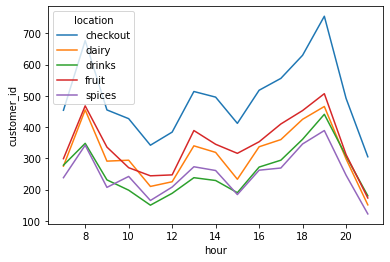

In [58]:
sns.lineplot('hour','customer_id',hue='location',data=df_otf)

In [33]:
d={}
for key,value in df_g_l:
    d[key]=len(value)
print('Calculate the total number of customers in each section',d)


Calculate the total number of customers in each section {'checkout': 7417, 'dairy': 4679, 'drinks': 3905, 'fruit': 5122, 'spices': 3754}


In [42]:
df_g_l.dtypes

,customer_id,hour,day
location,,,
checkout,string,int64,int64
dairy,string,int64,int64
drinks,string,int64,int64
fruit,string,int64,int64
spices,string,int64,int64


In [43]:
type(df_g_l)

pandas.core.groupby.generic.DataFrameGroupBy

In [34]:
# check the values in the groupby subset
for key,value in df_g_l:
    print(key)
    print(value)
   # print(len(value))

checkout
                     location customer_id  hour  day
timestamp                                           
2019-09-06 07:01:00  checkout          62     7    6
2019-09-06 07:02:00  checkout          64     7    6
2019-09-06 07:04:00  checkout          68     7    6
2019-09-06 07:05:00  checkout          61     7    6
2019-09-06 07:05:00  checkout          67     7    6
...                       ...         ...   ...  ...
2019-09-04 21:45:00  checkout       41525    21    4
2019-09-04 21:46:00  checkout       41516    21    4
2019-09-04 21:47:00  checkout       41526    21    4
2019-09-04 21:48:00  checkout       41522    21    4
2019-09-04 21:49:00  checkout       41531    21    4

[7417 rows x 4 columns]
dairy
                    location customer_id  hour  day
timestamp                                          
2019-09-06 07:00:00    dairy          61     7    6
2019-09-06 07:01:00    dairy          65     7    6
2019-09-06 07:02:00    dairy          67     7    6
2019-09-06 

In [37]:
def get_customer_time(df):
   # df.sort_values('timestamp', inplace=True)
    df['time_spent'] = df.index.max() - df.index.min()
    return df

In [38]:
#Calculate the time each customer spent in the market
df_g_c=df.groupby(['customer_id']).apply(get_customer_time)

In [39]:
df_g_c

,location,customer_id,hour,day,time_spent
timestamp,,,,,
2019-09-06 07:00:00,dairy,61,7,6,0 days 00:05:00
2019-09-06 07:00:00,drinks,62,7,6,0 days 00:01:00
2019-09-06 07:00:00,fruit,63,7,6,0 days 00:11:00
2019-09-06 07:01:00,checkout,62,7,6,0 days 00:01:00
2019-09-06 07:01:00,drinks,64,7,6,0 days 00:01:00
...,...,...,...,...,...
2019-09-04 21:48:00,spices,41528,21,4,0 days 00:03:00
2019-09-04 21:49:00,dairy,41520,21,4,0 days 00:09:00
2019-09-04 21:49:00,dairy,41529,21,4,0 days 00:04:00
